Carbon Footprint Estimator (Regression Task)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv(r"C:\Users\SIVA SAI\Downloads\archive (3)\Carbon Emission.csv")
print(df.columns)
print(df.head(4))

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')
    Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0  overweight  female  pescatarian            daily                  coal   
1       obese  female   vegetarian  less frequently           natural gas   
2  overweight    male     omnivore  more frequently                  wood   
3  overweight    male     omnivore      twice a day                  wood   

      Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
0        public          NaN           often                   23

In [9]:
df = df.rename(columns={
    'Diet': 'diet_type',
    'Transport': 'transport_mode',
    'Vehicle Monthly Distance Km': 'vehicle_km',
    'CarbonEmission': 'carbon_kg_per_week'
})

In [10]:
df = df[['diet_type', 'transport_mode', 'vehicle_km', 'carbon_kg_per_week']].dropna()


In [12]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['diet_type', 'transport_mode']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['diet_type', 'transport_mode']))

In [13]:
X = pd.concat([encoded_df, df[['vehicle_km']].reset_index(drop=True)], axis=1)
y = df['carbon_kg_per_week'].reset_index(drop=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 652504.19


In [23]:
print("Min:", y.min())
print("Max:", y.max())
print("Mean:", y.mean())


Min: 306
Max: 8377
Mean: 2269.1473


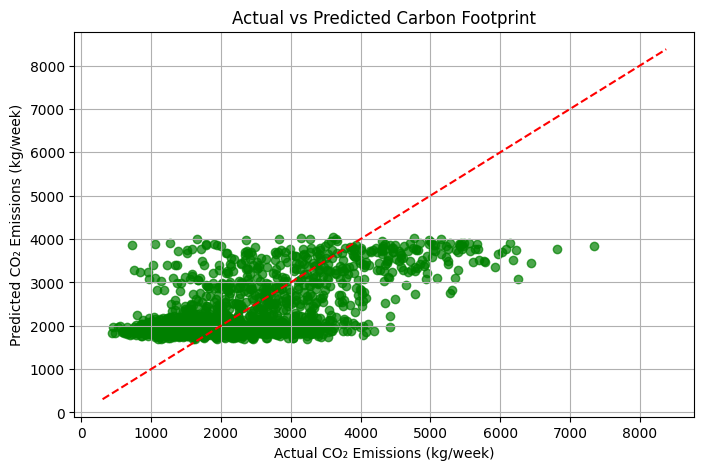

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual CO₂ Emissions (kg/week)")
plt.ylabel("Predicted CO₂ Emissions (kg/week)")
plt.title("Actual vs Predicted Carbon Footprint")
plt.grid(True)
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=4, random_state=42)

In [21]:
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"🌳 Decision Tree MSE: {mse_tree:.2f}")

🌳 Decision Tree MSE: 672392.56


In [24]:
print("Min:", y.min())
print("Max:", y.max())
print("Mean:", y.mean())


Min: 306
Max: 8377
Mean: 2269.1473


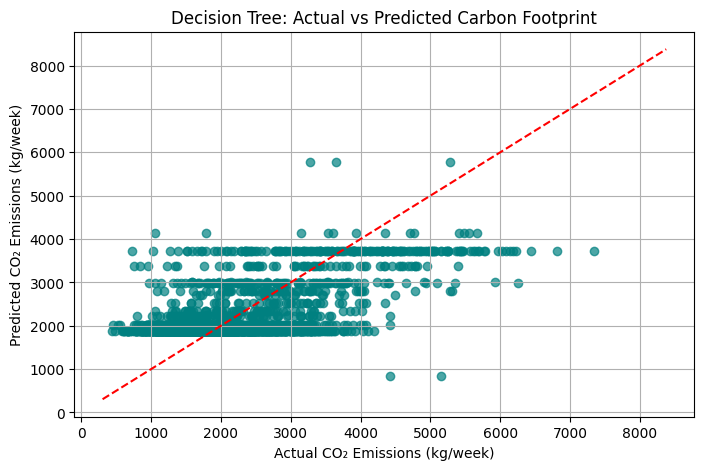

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_tree, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual CO₂ Emissions (kg/week)")
plt.ylabel("Predicted CO₂ Emissions (kg/week)")
plt.title("Decision Tree: Actual vs Predicted Carbon Footprint")
plt.grid(True)
plt.show()